In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./properatti.csv", delimiter=',')
print(data.shape)
data.head(2)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [4]:
print(data.shape) # tamaño del DataFrame
print(data.info())

(121220, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  p

In [5]:
#tipos de datos de cada columna
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [6]:
#surface_covered_in_m2, price_usd_per_m2
data.surface_covered_in_m2.describe()

data.price_usd_per_m2.describe()


count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

La libreria missingno proporciona una serie de visualizaciones para comprender la presencia y distribución de datos faltantes dentro de un DataFrame

<AxesSubplot:>

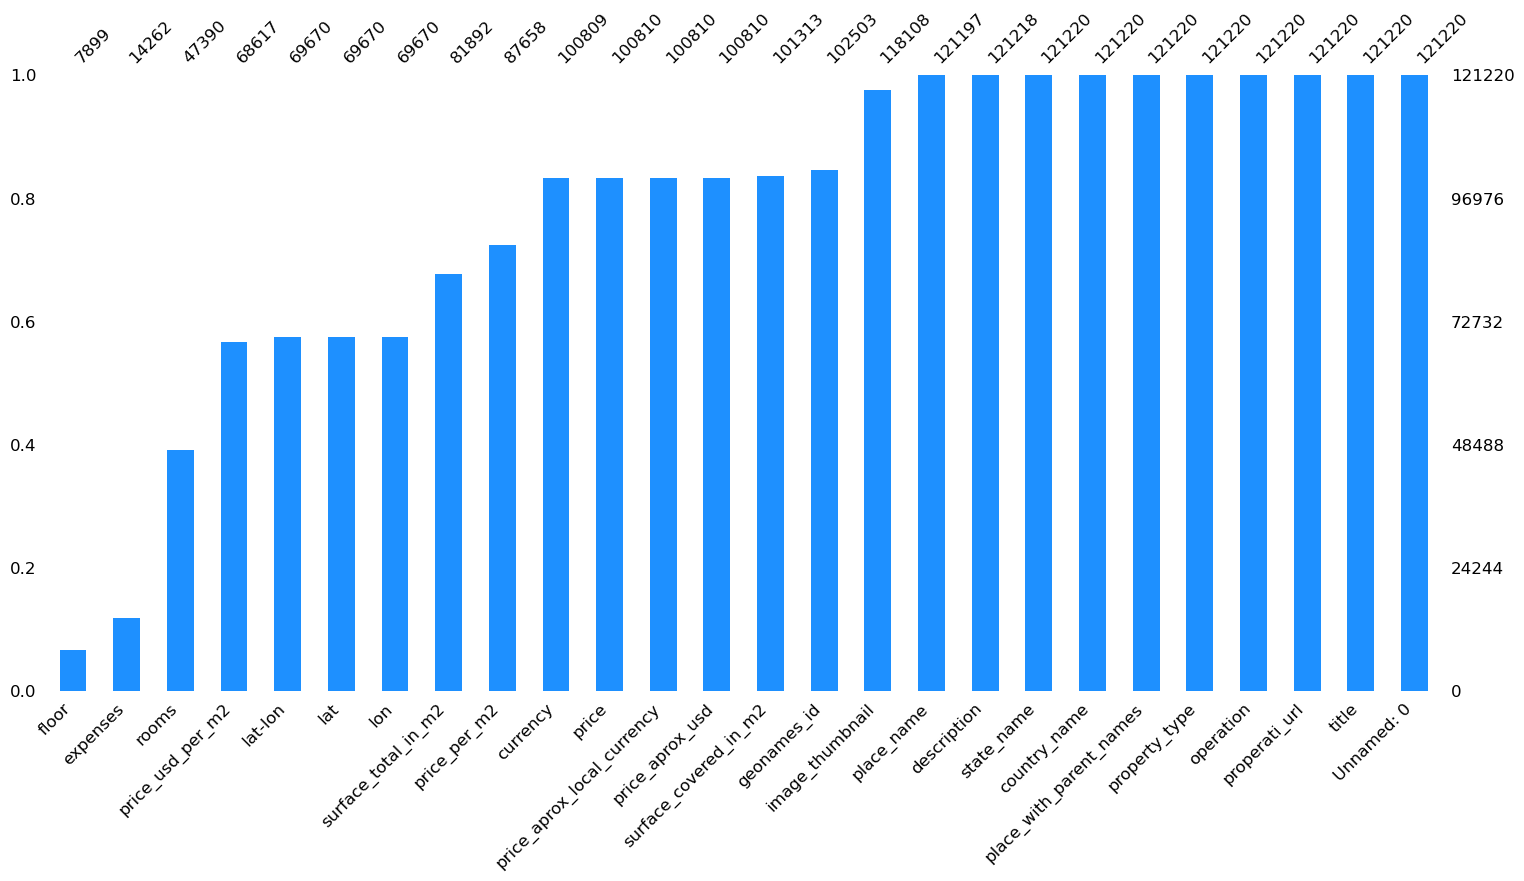

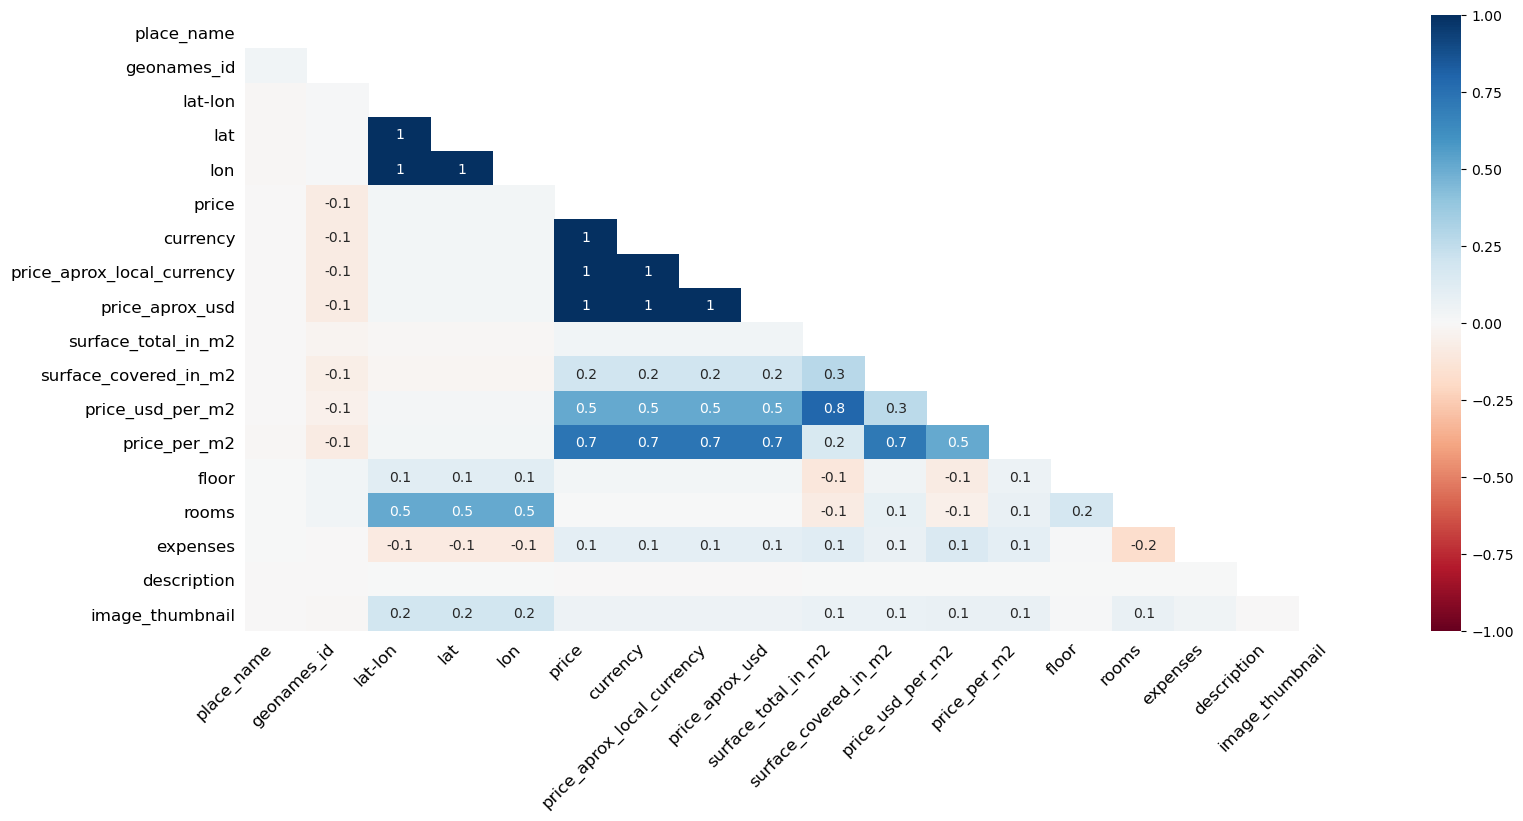

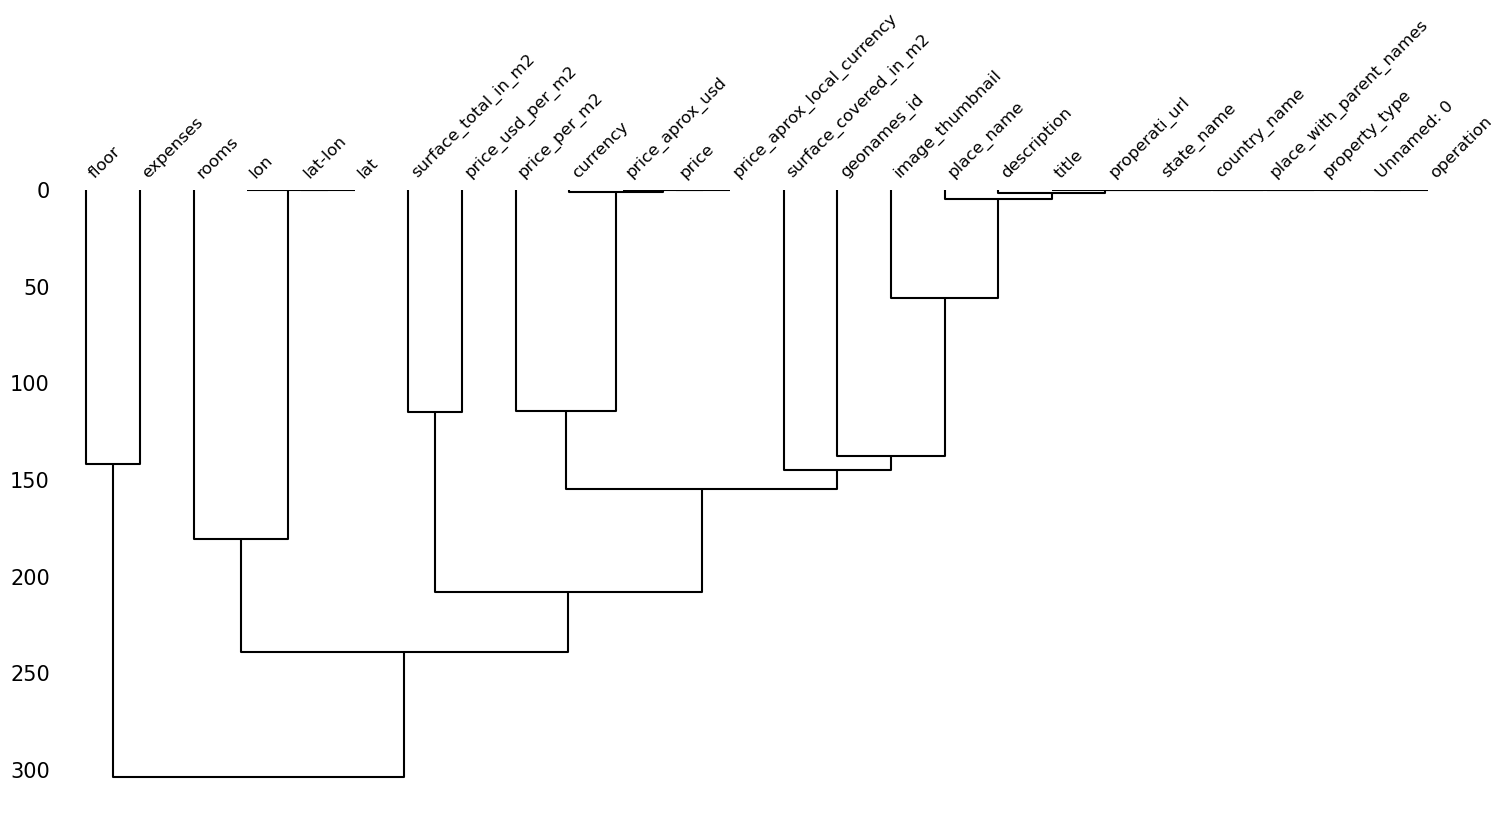

In [7]:
import missingno as msno # proporciona una serie de visualizaciones para comprender la presencia y distribución de datos faltantes dentro de un DataFrame

data.isna().sum()

msno.bar(data, color="dodgerblue", sort="ascending", fontsize=12, figsize=(18,8)) # gráfico simple donde cada barra representa una columna dentro del marco de datos. La altura de la barra indica qué tan completa está esa columna, es decir, cuántos valores no nulos están presentes
msno.heatmap(data, fontsize=12, figsize=(18,8)) #el mapa de calor se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas
msno.dendrogram(data, fontsize=12, figsize=(18,8))

Teniendo en Cuenta los análisis anteriores, se opta por eliminar las siguientes columnas:

Categoricas (practicamente todas las observaciones son diferentes)
1) Unnamed: 0
2) operation
3) place_with_parent_names	
4) properati_url
5) description	
6) title
7) image_thumbnail
8) country_name (todas las observaciones son de Argentina)

Cuantitativas con muy pocos datos (<40%)

9) floor
10) expenses


Hay 5 variables que tienen la misma información, con coeficiente de correlación de "1", será seleccionada price_usd_per_m2 ya que da amyor información y estandar (USD/m2). Por lo tanto se eliminan las siguientes columnas

price                         
currency                       
price_aprox_local_currency
price_aprox_usd

In [8]:
# data_1 tiene el DataFrame despues de eliminar columnas 

data_1 = data.drop(["Unnamed: 0", "operation", "place_with_parent_names", "geonames_id", "lat", "lon", "properati_url", "description", "title",  "image_thumbnail", "floor", "expenses", "currency", "country_name", "lat-lon", "price", "price_aprox_local_currency"], axis=1)
data_1.head(3)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
0,PH,Mataderos,Capital Federal,62000.0,55.0,40.0,1127.272727,1550.000000,NaN
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur,150000.0,NaN,NaN,NaN,NaN,NaN
2,apartment,Mataderos,Capital Federal,72000.0,55.0,55.0,1309.090909,1309.090909,NaN


In [9]:
data.geonames_id.describe()

count    1.025030e+05
mean     3.574442e+06
std      3.541306e+05
min      3.427208e+06
25%      3.430234e+06
50%      3.433910e+06
75%      3.836668e+06
max      6.948895e+06
Name: geonames_id, dtype: float64

Visualizar datos extremos

<function matplotlib.pyplot.show(close=None, block=None)>

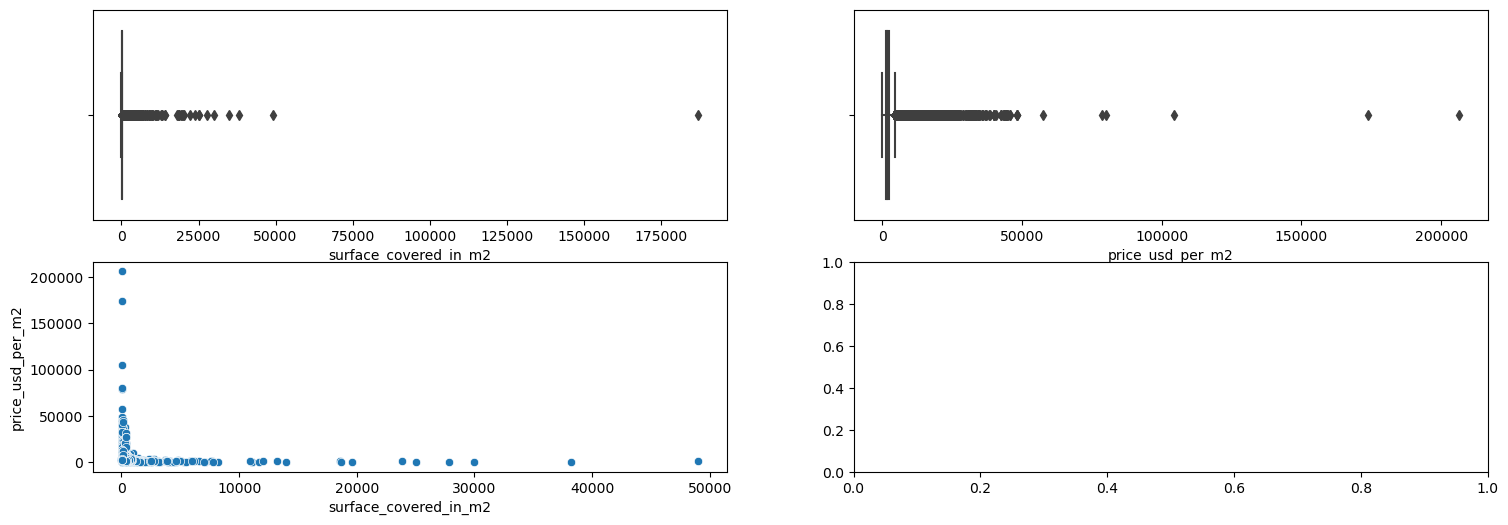

In [10]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize = (18,6))
sns.boxplot(x=data["surface_covered_in_m2"], ax=axes[0,0])
sns.boxplot(x=data["price_usd_per_m2"], ax=axes[0,1])
sns.scatterplot(data=data, x="surface_covered_in_m2", y="price_usd_per_m2", ax=axes[1,0])
plt.show

In [11]:
#Analisis de cuartiles para superficie cubierta en m2
Q1_sc = data["surface_covered_in_m2"].quantile(0.25)
Q3_sc = data["surface_covered_in_m2"].quantile(0.75)
print("los cuartiles para superficie cubierta en m2 son: ", round(Q1_sc), round(Q3_sc))

IQR_sc = Q3_sc-Q1_sc

lim_inf_sc = Q1_sc - 5*IQR_sc
lim_sup_sc = Q3_sc + 5*IQR_sc

print("Los limites para superficie cubierta en m2 son: ", round(lim_inf_sc), round(lim_sup_sc))

#Analisis de cuartiles para el precio en USD por m2
Q1_pusd = data["price_usd_per_m2"].quantile(0.25)
Q3_pusd = data["price_usd_per_m2"].quantile(0.75)
print("los cuartiles para el precio en USD por m2 son: ", round(Q1_pusd, 2), round(Q3_pusd, 2))

IQR_pusd = Q3_pusd - Q1_pusd

lim_inf_pusd = Q1_pusd - 1.5*IQR_pusd
lim_sup_pusd = Q3_pusd + 1.5*IQR_pusd

print("Los limites para el precio en USD por m2 son: ", round(lim_inf_pusd, 2), round(lim_sup_pusd, 2))

los cuartiles para superficie cubierta en m2 son:  45 150
Los limites para superficie cubierta en m2 son:  -480 675
los cuartiles para el precio en USD por m2 son:  1218.18 2486.41
Los limites para el precio en USD por m2 son:  -684.16 4388.76


In [12]:
##Eliminar datos atipicos

# 1) Superficie cubierta en m2
mask_100m2 = data.surface_covered_in_m2<= 1000  # con esta mascara se eliminan 379 observaciones
mask_isna = data.surface_covered_in_m2.isna() == True

data_scm2 = data[mask_100m2 | mask_isna]
print(data_scm2.shape) # con esta mascara se eliminan 379 observaciones

# 1) Precio en dolares por en m2

mask_usdm2 = data.price_usd_per_m2<= 10000  # con esta mascara se eliminan 873 observaciones
mask_isna_usd = data.price_usd_per_m2.isna() == True

data_usdm2 = data[mask_usdm2 | mask_isna_usd]
print(data_usdm2.shape)

(120841, 26)
(120347, 26)


[(0.0, 10000.0)]

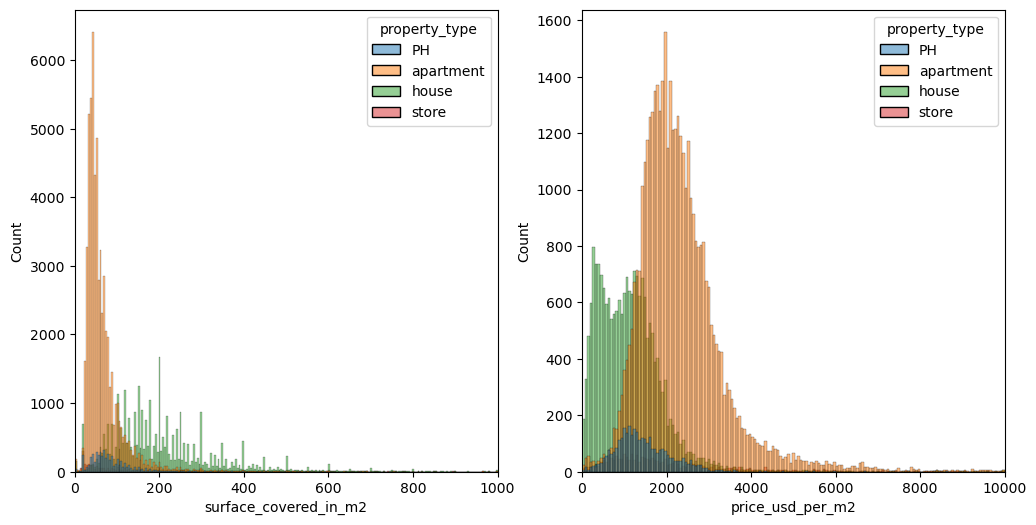

In [13]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12,6))

s_p = sns.histplot(data=data_scm2, x = "surface_covered_in_m2", hue="property_type", ax=axes[0])
s_p.set(xlim = (0, 1000))

p_p = sns.histplot(data=data_usdm2, x = "price_usd_per_m2", hue="property_type", ax=axes[1])
p_p.set(xlim = (0, 10000))

(array([1391., 2655., 2609., 2638., 3433., 4083., 5170., 6127., 6209.,
        5981., 5028., 4537., 3905., 3123., 2770., 1790., 1340., 1005.,
         702.,  518.,  407.,  345.,  288.,  229.,  205.,  158.,  120.,
         133.,  115.,  114.,   77.,   53.,   76.,   85.,   51.,   31.,
          25.,   19.,   22.,   37.,    7.,   21.,   15.,   14.,   12.,
           9.,   17.,   16.,   10.,   19.]),
 array([6.000000e-01, 2.005880e+02, 4.005760e+02, 6.005640e+02,
        8.005520e+02, 1.000540e+03, 1.200528e+03, 1.400516e+03,
        1.600504e+03, 1.800492e+03, 2.000480e+03, 2.200468e+03,
        2.400456e+03, 2.600444e+03, 2.800432e+03, 3.000420e+03,
        3.200408e+03, 3.400396e+03, 3.600384e+03, 3.800372e+03,
        4.000360e+03, 4.200348e+03, 4.400336e+03, 4.600324e+03,
        4.800312e+03, 5.000300e+03, 5.200288e+03, 5.400276e+03,
        5.600264e+03, 5.800252e+03, 6.000240e+03, 6.200228e+03,
        6.400216e+03, 6.600204e+03, 6.800192e+03, 7.000180e+03,
        7.200168e+03, 7.

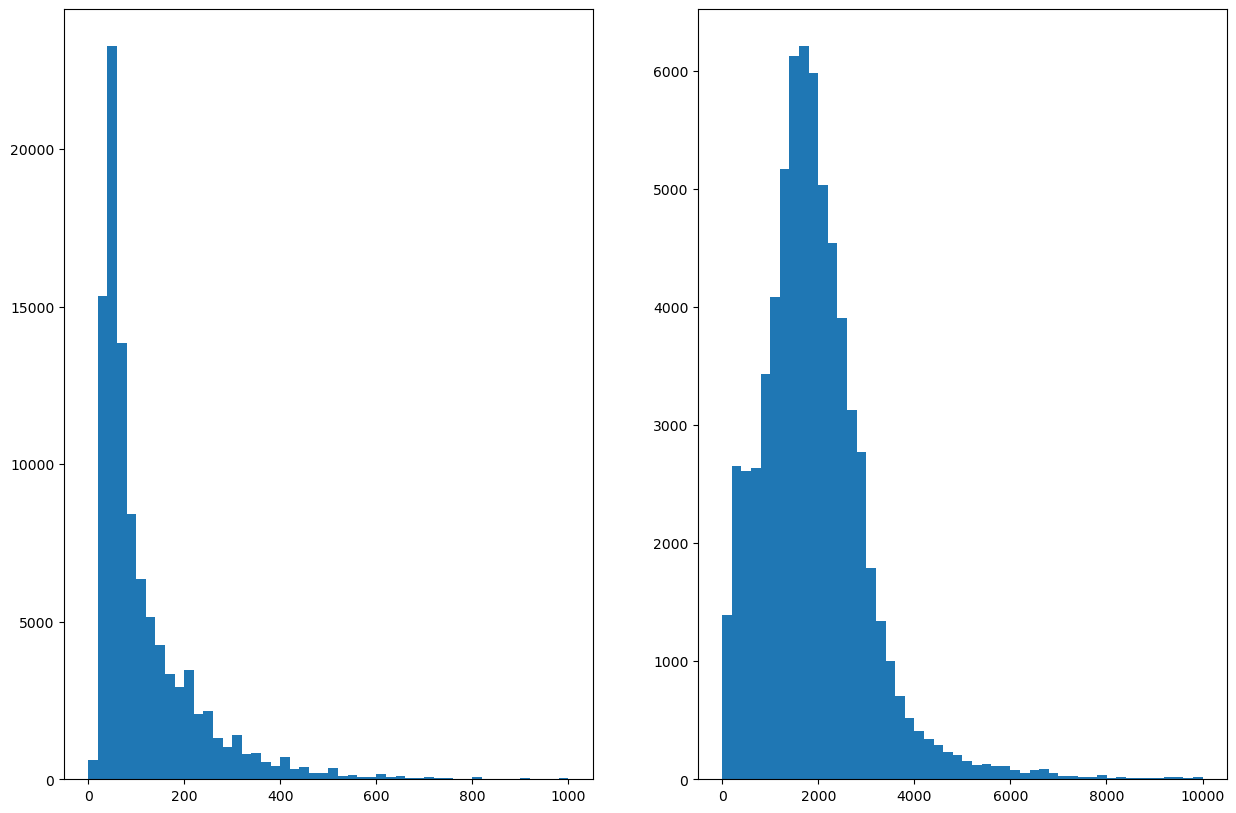

In [14]:
#Histograma
%matplotlib inline

n_bins = 50

fig, axs = plt.subplots(1,2, figsize = (15,10))
axs[0].hist(data_scm2.surface_covered_in_m2, bins = n_bins)
axs[1].hist(data_usdm2.price_usd_per_m2, bins = n_bins)
#axs[1,0].hist(data.price_usd_per_m2)
#axs[1,1].hist(data.price_per_m2)



Segun estos análisis la Superficie mayores a 1000m2  y los precios en dolares por m2 mayores a 10000 son puntos extremos. 
Esto no quiere decir que no sean "reales", pero van a sesgar seguramento futuros modelos en el TP2
Teniendo en cuenta estos limites, tenemos 379 observaciones extremas para "surface_covered_in_m2" y 873 para "price_usd_per_m2"

¿Que se hacemos con esas observaciones?

<AxesSubplot:>

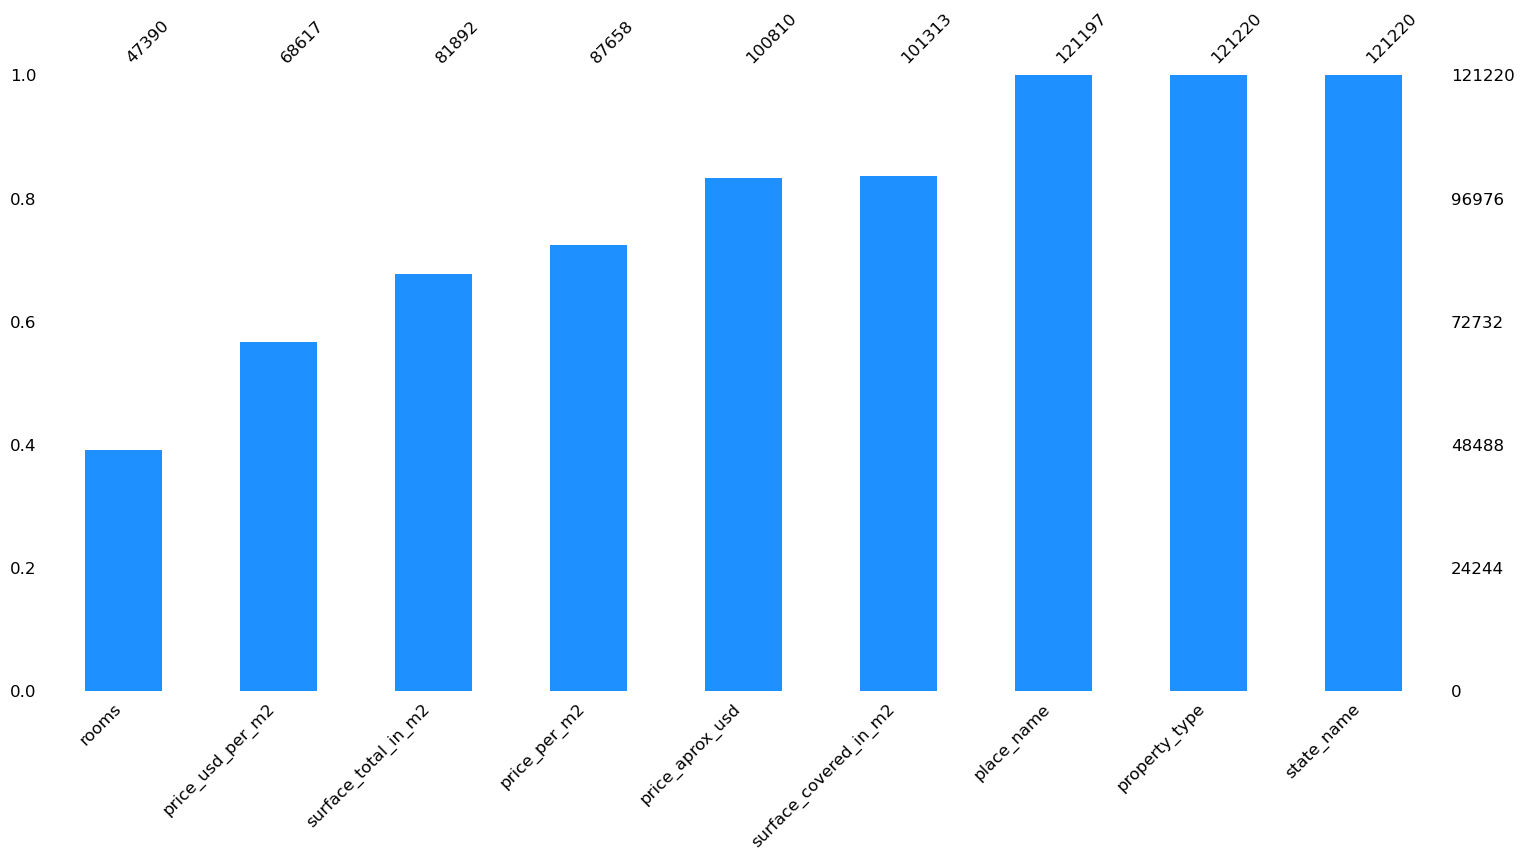

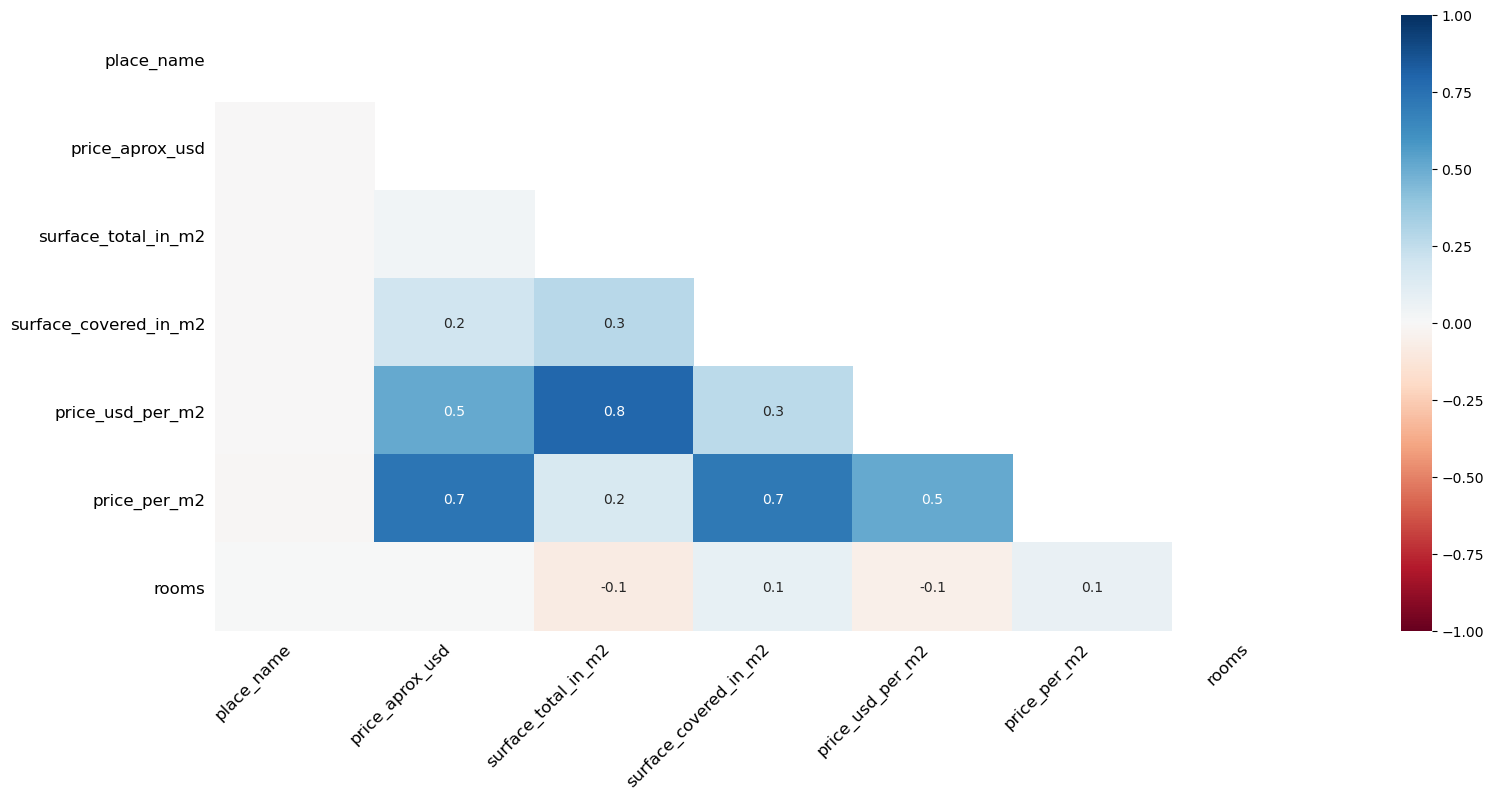

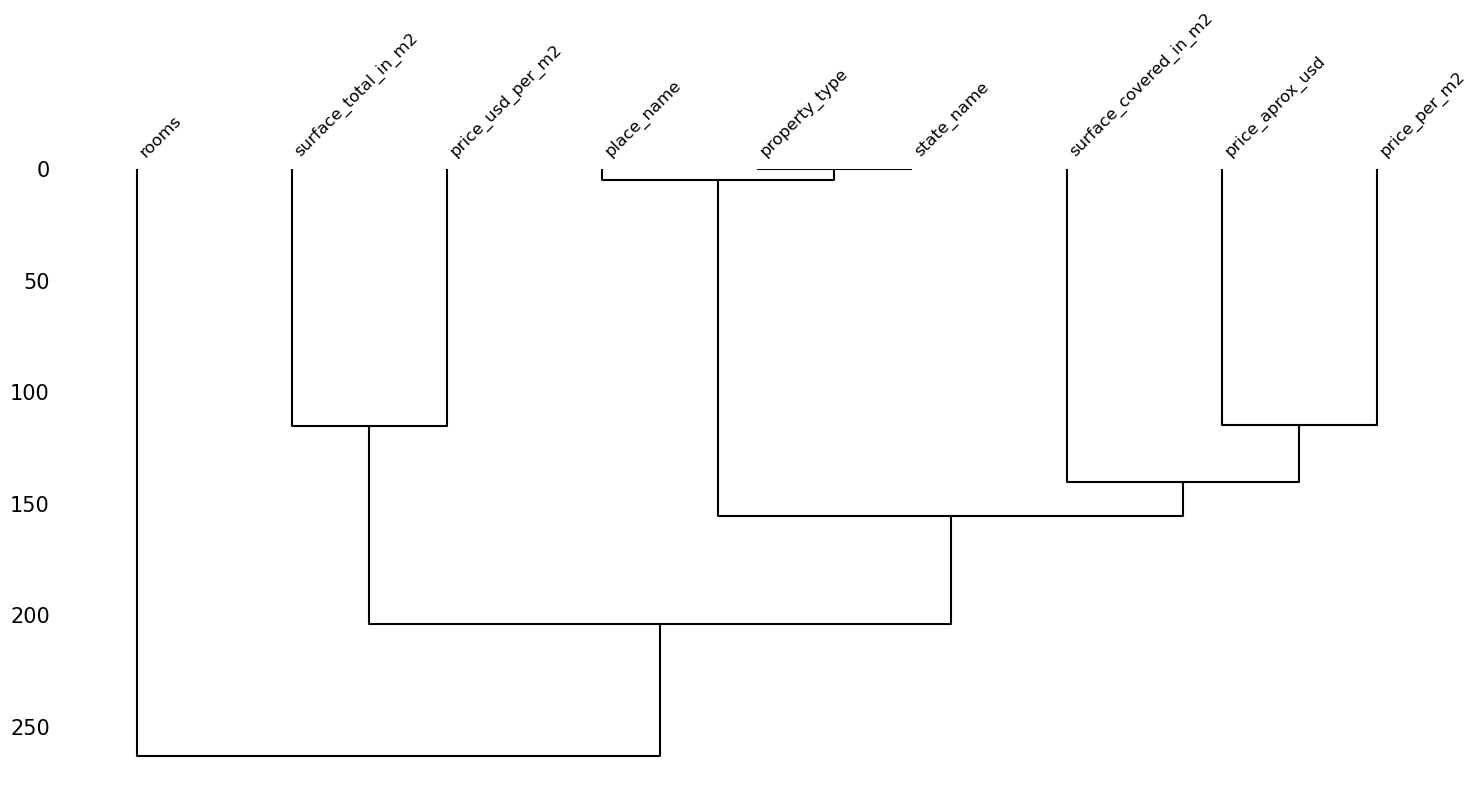

In [15]:
msno.bar(data_1, color="dodgerblue", sort="ascending", fontsize=12, figsize=(18,8))
msno.heatmap(data_1, fontsize=12, figsize=(18,8)) #el mapa de calor se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas
msno.dendrogram(data_1, fontsize=12, figsize=(18,8))

In [16]:
data.price.count()
data.price_aprox_usd.count()
data.price_aprox_local_currency.count()


data_1.surface_total_in_m2.count()
data_1.surface_covered_in_m2.count()

101313

In [17]:
#mask_100m2 = data.surface_total_in_m22<= 1000
mask_isna_superficie_total = data_1.surface_total_in_m2.isna() == False
data_2 = data_1[mask_isna_superficie_total]

data_2.shape

data_2.head(5)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
0,PH,Mataderos,Capital Federal,62000.0,55.0,40.0,1127.272727,1550.000000,NaN
2,apartment,Mataderos,Capital Federal,72000.0,55.0,55.0,1309.090909,1309.090909,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica,64000.0,35.0,35.0,1828.571429,1828.571429,NaN
5,house,Gualeguaychú,Entre Ríos,NaN,53.0,NaN,NaN,NaN,NaN
6,PH,Munro,Bs.As. G.B.A. Zona Norte,130000.0,106.0,78.0,1226.415094,1666.666667,NaN


In [18]:
prome_agrup_tipo_place = data_2.groupby(["property_type", "place_name"])
prome_agrup_tipo_place.head()

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
0,PH,Mataderos,Capital Federal,62000.0,55.0,40.0,1127.272727,1550.000000,NaN
2,apartment,Mataderos,Capital Federal,72000.0,55.0,55.0,1309.090909,1309.090909,NaN
4,apartment,Centro,Buenos Aires Costa Atlántica,64000.0,35.0,35.0,1828.571429,1828.571429,NaN
5,house,Gualeguaychú,Entre Ríos,NaN,53.0,NaN,NaN,NaN,NaN
6,PH,Munro,Bs.As. G.B.A. Zona Norte,130000.0,106.0,78.0,1226.415094,1666.666667,NaN
...,...,...,...,...,...,...,...,...,...
120061,house,Los Acantilados,Buenos Aires Costa Atlántica,72000.0,500.0,86.0,144.000000,837.209302,3.0
120081,house,Pablo Podestá,Bs.As. G.B.A. Zona Oeste,102000.0,165.0,50.0,618.181818,2040.000000,3.0
120082,apartment,Barrio La Perla Norte,Buenos Aires Costa Atlántica,72000.0,50.0,45.0,1440.000000,1600.000000,2.0
120083,PH,Villa Bonich,Bs.As. G.B.A. Zona Norte,49500.0,47.0,39.0,1053.191489,1269.230769,2.0


In [19]:



print('Missing price_per_m2 DATA 2 => ', data_2['price_usd_per_m2'].isna().sum() )
     
#llenamos los datos faltantes con el promedio por ubicacion y tipo de propiedad
data_3 = data_2.groupby(["property_type", "place_name"]).apply(lambda x: x.fillna(value={'price_usd_per_m2': x['price_usd_per_m2'].mean() }))


print('Missing price_per_m2 DATA 4=> ', data_3['price_usd_per_m2'].isna().sum() )
data_3[ data_3.price_per_m2.isna() == True].head()

Missing price_per_m2 DATA 2 =>  13275
Missing price_per_m2 DATA 4=>  601


property_type place_name  \
property_type place_name                                  
PH            Abasto     7685             PH     Abasto   
              Adrogué    69271            PH    Adrogué   
              Almagro    15479            PH    Almagro   
                         36680            PH    Almagro   
                         60924            PH    Almagro   

                                            state_name  price_aprox_usd  \
property_type place_name                                                  
PH            Abasto     7685          Capital Federal              NaN   
              Adrogué    69271  Bs.As. G.B.A. Zona Sur         198000.0   
              Almagro    15479         Capital Federal              NaN   
                         36680         Capital Federal              NaN   
                         60924         Capital Federal              NaN   

                                surface_total_in_m2  surface_covered_in_m2  \
property_type place_name                                                     
PH            Abasto     7685                  86.0                    NaN   
              Adrogué    69271                110.0                    NaN   
              Almagro    15479                228.0                  167.0   
                         36680                225.0                  150.0   
                         60924                225.0                  150.0   

                                price_usd_per_m2  price_per_m2  rooms  
property_type place_name                                               
PH            Abasto     7685        1570.485350           NaN    4.0  
              Adrogué    69271       1800.000000           NaN    NaN  
              Almagro    15479       1760.360408           NaN    5.0  
                         36680       1760.360408           NaN    NaN  
                         60924       1760.360408           NaN    NaN